In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [278]:
df = pd.read_csv("ResumeDataset.csv")
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [279]:
df.iloc[0,1]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [280]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [281]:
df.shape

(962, 2)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [283]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

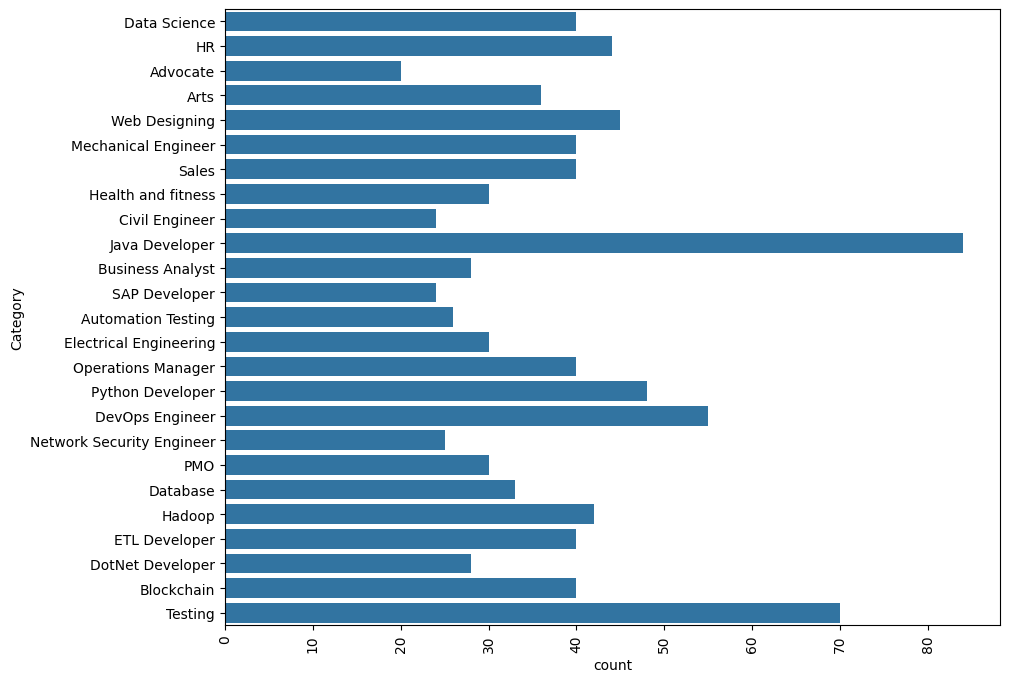

In [284]:
# Plotting graphs for the count of unique job roles
plt.figure(figsize=(10,8))
sns.countplot(data=df['Category'])
plt.xticks(rotation=90)
plt.show()

In [285]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

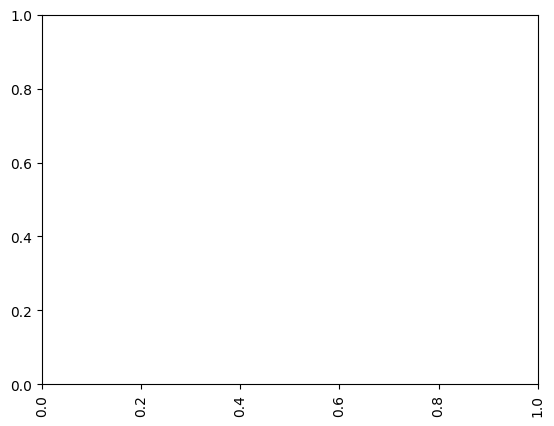

In [286]:
plt.xticks(rotation=90)
plt.show()

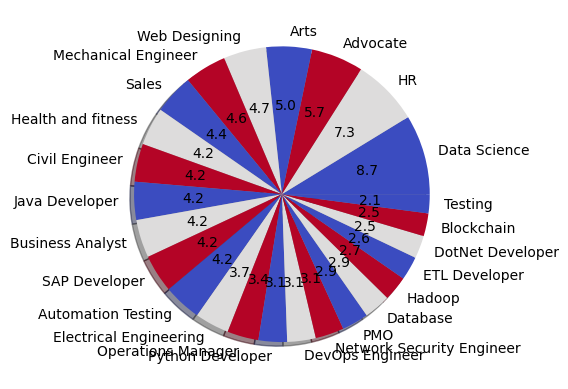

In [287]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

plt.pie(counts, labels=labels, autopct='%1.1f', shadow=True, colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

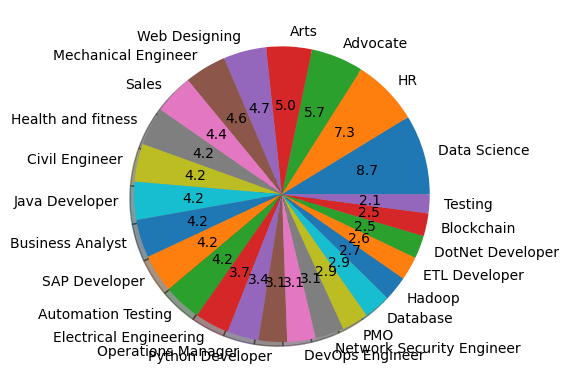

In [288]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

plt.pie(counts, labels=labels, autopct='%1.1f', shadow=True)
plt.show()

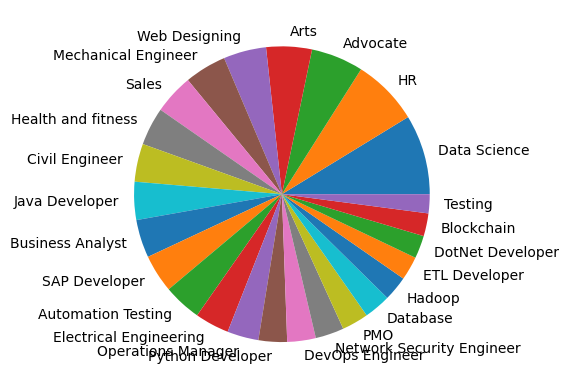

In [289]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

plt.pie(counts, labels=labels)
plt.show()

In [290]:
# types of pie-graphs/charts based on visual effects

In [291]:
# ---------------------------------------------------------------------------

In [292]:
# Exploring Resume
df['Category'][0]

'Data Science'

In [293]:
print(df['Resume'][0]) # Single resume cell value

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

In [294]:
# Cleaning Data - Removing unnecessary things


In [295]:
# ** 6 Very important Steps **
import re 

def cleanResume(text):
    # 1) # remove URLs - http://helloworld
    cleantxt = re.sub(r'http\S+','', text) # Remove anything from https: till the next whitespace
    # 2) remove emails [....@....]
    cleantxt = re.sub(r'\S+@\S+','', cleantxt) # Removes anthing before and after '@'
    # 3) remove hashtags [#....]
    cleantxt = re.sub(r'#\S+','', cleantxt) # Removes anthing after '#'
    # 4) remove special characters
    cleantxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[/]^_'{|}~"""),'', cleantxt)
    # remove RT, cc safely
    cleantxt = re.sub(r'\bRT\b|\bcc\b', '', cleantxt)
    # 5) remove non-ASCII
    cleantxt = re.sub(r'[^\x00-\x7f]','', cleantxt)
    # 6) Removes any type of whitespaces like \t, \n etc with a single whitespace
    # normalize whitespace
    cleantxt = re.sub(r'\s+',' ', cleantxt)
    
    
    cleantxt = cleantxt.strip()  
    return cleantxt

In [296]:
result = cleanResume("Hello,######## \n   ! @ # $ % ^ & * ( )\t my name is Monish. My github - https://github/Monish-D609. And this is my gmail - monishpersonl609@gmail.com. #Monish_NotHUMAN609 is my nickname \t \n")
print(result)

Hello my name is Monish My github And this is my gmail is my nickname


In [297]:
# What this line of does is
# cleantxt = re.sub(r'[^\x00-\x7f]', '', cleantxt)




# What This Regex Means (Character by Character)
# [ ... ] → Character class
# Matches one character at a time.
# ^ inside [] → Negation
# Means “NOT these characters”.
# \x00-\x7f → Hexadecimal ASCII range
# \x00 → ASCII 0
# \x7f → ASCII 127
# This range includes:
# All standard English letters (A–Z, a–z)
# Digits (0–9)
# Common punctuation
# Whitespace characters
# Final Meaning
# Match any character that is NOT a standard ASCII character.
# Then:
# Replace it with '' (nothing)
# Effectively delete it

In [298]:
# This range includes:
# All standard English letters (A–Z, a–z)
# Digits (0–9)
# Common punctuation
# Whitespace characters
# Final Meaning
# Match any character that is NOT a standard ASCII character.
# Then:
# Replace it with '' (nothing)
# Effectively delete it

In [299]:
print(df['Resume'].iloc[0])

Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprience - 24 months
Python- Exprience - 24 monthsCompany Details 
company - Ernst & Young LLP
description - Fraud Investigations and Dispute Services   Assur

In [300]:
# Apply this function to all cell values of the df
df['Resume'] = df['Resume'].apply(cleanResume)
print(df['Resume'].iloc[0]) ## Hence the text is cleaned

Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM Nave Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the review

In [301]:
# Encoding the df['Category'] using label encoder


In [302]:
# Encoding and keeping a track of all the categories and their respective encoded integer
from sklearn.preprocessing import LabelEncoder

# target column (example)
y = df['Category']

# encode
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# create mapping dictionaries
label_to_int = dict(zip(le.classes_, le.transform(le.classes_)))
# Maps it this way -> {'role': encoded_integer}
#  {'Data Science': np.int64(6) } 

int_to_label = dict(zip(le.transform(le.classes_), le.classes_))
# Maps it this way -> {encoded_integer: 'role'}
# {np.int64(6): 'Data Science' }

# optional: inspect
int_to_label


{np.int64(0): 'Advocate',
 np.int64(1): 'Arts',
 np.int64(2): 'Automation Testing',
 np.int64(3): 'Blockchain',
 np.int64(4): 'Business Analyst',
 np.int64(5): 'Civil Engineer',
 np.int64(6): 'Data Science',
 np.int64(7): 'Database',
 np.int64(8): 'DevOps Engineer',
 np.int64(9): 'DotNet Developer',
 np.int64(10): 'ETL Developer',
 np.int64(11): 'Electrical Engineering',
 np.int64(12): 'HR',
 np.int64(13): 'Hadoop',
 np.int64(14): 'Health and fitness',
 np.int64(15): 'Java Developer',
 np.int64(16): 'Mechanical Engineer',
 np.int64(17): 'Network Security Engineer',
 np.int64(18): 'Operations Manager',
 np.int64(19): 'PMO',
 np.int64(20): 'Python Developer',
 np.int64(21): 'SAP Developer',
 np.int64(22): 'Sales',
 np.int64(23): 'Testing',
 np.int64(24): 'Web Designing'}

In [303]:
df['Category'] = y_encoded
df['Category'].value_counts()

Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
22    40
6     40
16    40
10    40
3     40
18    40
1     36
7     33
14    30
19    30
11    30
4     28
9     28
2     26
17    25
5     24
21    24
0     20
Name: count, dtype: int64

In [304]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [305]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df['Resume'], df['Category'], test_size=0.2, random_state=42, stratify=df['Category'])
X_train.shape

(769,)

In [306]:
# Vectorizing the df['Resume'] using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1, 2),
    min_df=2,
    max_df=0.9, max_features=5000)
X_train = tfidf.fit_transform(X_train)
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 140518 stored elements and shape (769, 5000)>

In [307]:
X_test = tfidf.transform(X_test)

In [308]:
Y_test.shape

(193,)

In [309]:
Y_train.nunique()

25

In [310]:
df['Category'].nunique()

25

In [311]:
# Hence in the train dataset, there are all the unique classes as in the original df

In [312]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


models = {
    "Linear SVM Classifier": LinearSVC(),
    "Logistic Regression": LogisticRegression(),
    "KNN Classifier": KNeighborsClassifier()    
}

In [313]:
from sklearn.metrics import accuracy_score, f1_score
def models_evaluation(models = models):
    for model_name, model in models.items():
        print(f'Training {model_name}' + "--"*40)
        model.fit(X_train, Y_train)
        y_pred = model.predict(X_test)
        scores = accuracy_score(Y_test, y_pred)
        print(f'Accuracy score: {scores:.20f}')
        f1 = f1_score(Y_test, y_pred, average="macro")
        print(f'f1 score: {f1:.20f}')
        print("--"*50)

In [314]:
models_evaluation(models)

Training Linear SVM Classifier--------------------------------------------------------------------------------
Accuracy score: 0.99481865284974091423
f1 score: 0.99445887445887448663
----------------------------------------------------------------------------------------------------
Training Logistic Regression--------------------------------------------------------------------------------
Accuracy score: 0.99481865284974091423
f1 score: 0.99445887445887448663
----------------------------------------------------------------------------------------------------
Training KNN Classifier--------------------------------------------------------------------------------
Accuracy score: 0.97927461139896376796
f1 score: 0.97378266178266192910
----------------------------------------------------------------------------------------------------


In [315]:
"Hence lets choose KNN as our best model"

'Hence lets choose KNN as our best model'

In [316]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
f1_score(Y_test, y_pred, average="macro")

0.9737826617826619

In [317]:
# -----------------------------------------------------------

In [318]:
# Dumping files
import joblib
# Things to dump
# 1) clf model
joblib.dump(tfidf, "tfidf.pkl")

# 2) tfidfVectorizer
joblib.dump(models["Linear SVM Classifier"], "model.pkl")


# Converting the key of the map from nd.array to int type 
int_to_label = {int(k): v for k, v in int_to_label.items()}
int_to_label

# 3) Map
joblib.dump(int_to_label,"int_to_label.pkl")

['int_to_label.pkl']